# Social Network Adds | Classification with Neural Network from Zero

## Description

In this notebook, the creation of a neural network is carried out step by step to classify whether or not a user bought a particular product, without the need for specialized AI libraries.

![Social Network Adds](add.jpg)

### Content:

1. [Library importation](#import)
2. [Load and Information of the data](#load)
3. [Exploritory Data Analysis](#eda)
4. [Data transformation](#trans)
5. [Network building](#build)
6. [Analysis and Metrics](#metrics)
7. [Conclusion](#con)

<hr>

### Targets:

* Exploratory data analysis.
* Preparation and transformation of data.
* Use of standardization and oversampling of data.
* Definition, configuration and training in network construction.
* Perform Network Performance Analysis and Metrics.
* Obtain conclusions.

## 1. Library importation <a name="import"></a>

In [1]:
import random
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# Oversampling Technique
from imblearn.over_sampling import SMOTE

# Data scaling
from sklearn.preprocessing import StandardScaler as SS

# Model metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.metrics import classification_report as cr

import warnings
warnings.filterwarnings("ignore")

## 2. Load and Information of the data <a name="load"></a>

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

### 2.1 Description

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## 3. Exploratory Data Analysis <a name="eda"></a>

### 3.1 Missing data

Let's see if there some lost data.

[Text(0.5, 1.0, 'Existent data (purple) and missing data (yellow) ratio')]

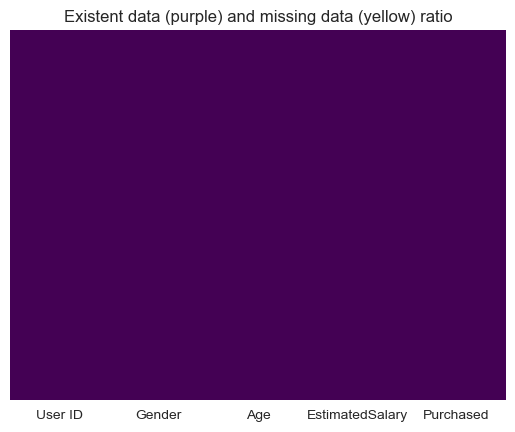

In [5]:
# Para identificar si existen datos nulos.
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis').set(title = 'Existent data (purple) and missing data (yellow) ratio')
# Datos sin Nulos.

In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### 3.2 Column encoding

To have a better management of the data, we will encode all the strings columns to a quantitative value columns for every feature.

In [7]:
re = {"Male": 0, "Female": 1}
df["Gender"] = df["Gender"].replace(re)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


### 3.3 Purchase and Gener count

Now let's see the balance of the data labels.

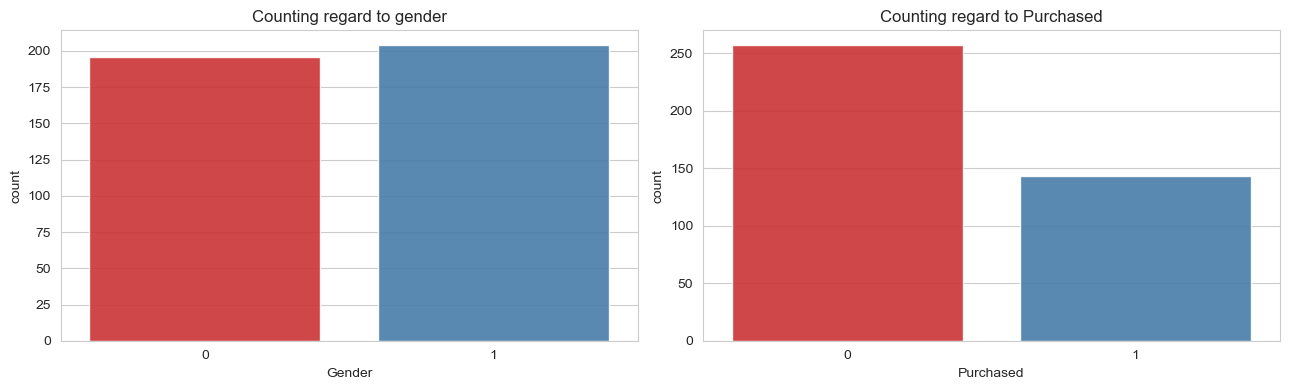

In [8]:
# Purchase count y gender
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4))

axes[0].set_title('Counting regard to gender')
sns.countplot(ax=axes[0], data=df, x='Gender', palette='Set1', alpha=0.9)

axes[1].set_title('Counting regard to Purchased')
sns.countplot(ax=axes[1], data=df, x='Purchased', palette='Set1', alpha=0.9)

plt.tight_layout()

It seems that there is a small imbalance in the purchase labels, this can later be corrected with oversampling, this will give us a certain improvement in the training of weights and biases of the network nodes.

### 3.4 Ages distribution

We will see if there is any abnormal behavior in the age data, since if so it could be taken into account in training.

[Text(0.5, 1.0, 'Ages distribution')]

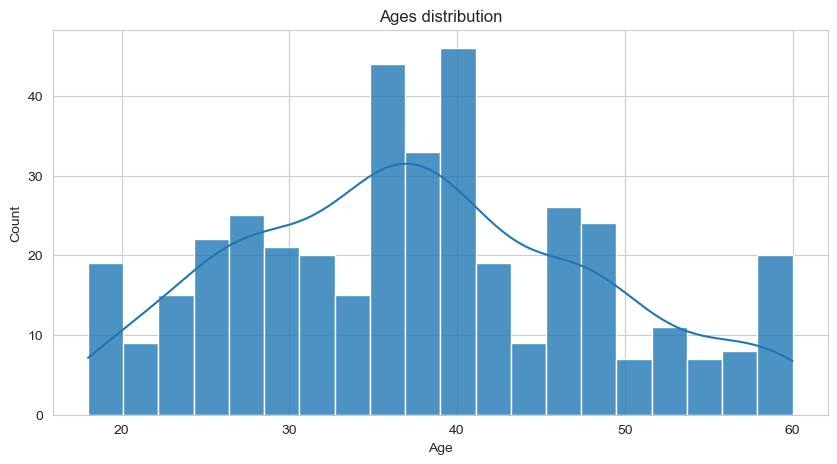

In [9]:
# Distribución Age
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Age', bins=20, kde=True, alpha=0.8, palette='Set1').set(title='Ages distribution')

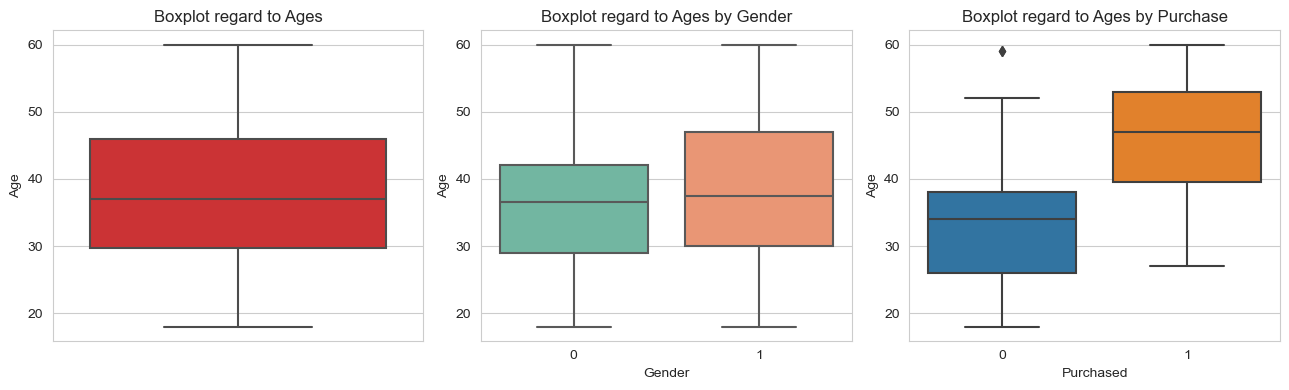

In [10]:
# Age column box plot, total and separated by gender and purchased
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13,4))

axes[0].set_title('Boxplot regard to Ages')
sns.boxplot(ax=axes[0], data=df, y='Age', palette='Set1')

axes[1].set_title('Boxplot regard to Ages by Gender')
sns.boxplot(ax=axes[1], data=df, y='Age', x='Gender', palette='Set2')

axes[2].set_title('Boxplot regard to Ages by Purchase')
sns.boxplot(ax=axes[2], data=df, y='Age', x='Purchased', palette='tab10')

plt.tight_layout()

There does not seem to be anything abnormal in the data, with a distribution within what was expected and without too many outliars.

### 3.5 Estimated Salary distribution

Likewise, now we will see how the estimated salary data is distributed.

[Text(0.5, 1.0, 'Estimated salary distribution')]

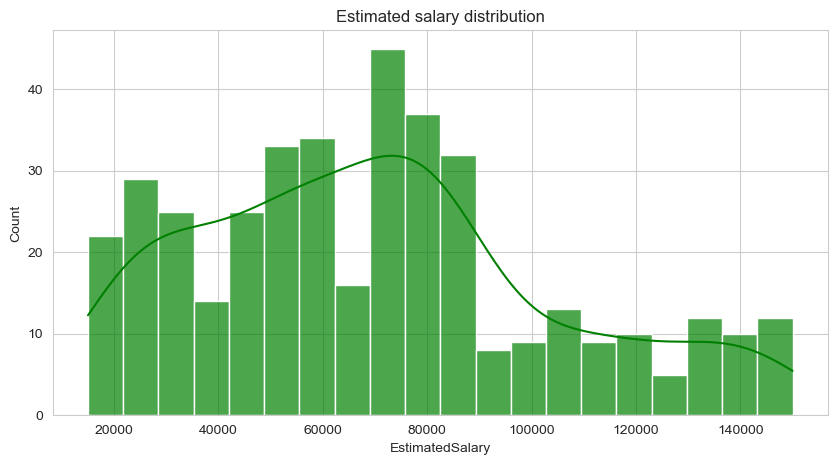

In [11]:
# Distribución Estimated Salary
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='EstimatedSalary', bins=20, kde=True, alpha=0.7, color='green').set(title='Estimated salary distribution')

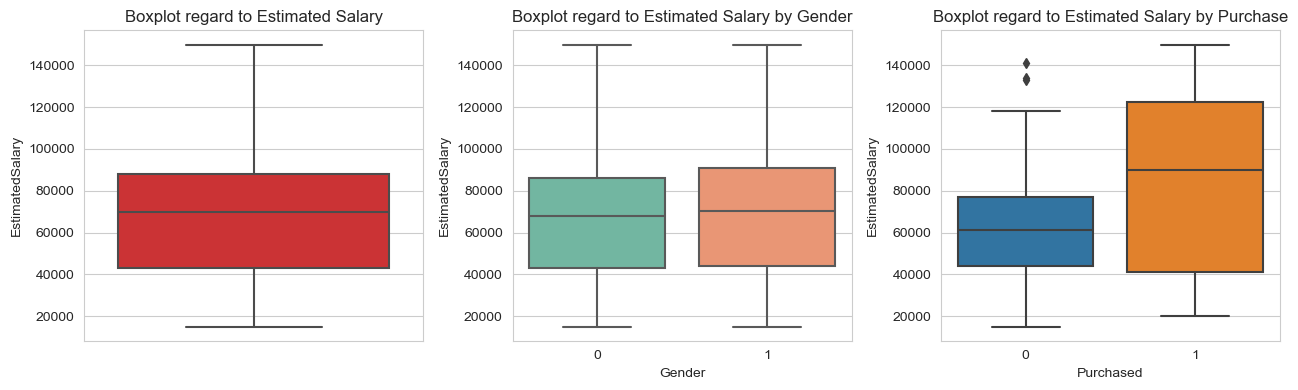

In [12]:
# Estimated Salary column box plot, total and separated by gender and purchased
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(13,4))

axes[0].set_title('Boxplot regard to Estimated Salary')
sns.boxplot(ax=axes[0], data=df, y='EstimatedSalary', palette='Set1')

axes[1].set_title('Boxplot regard to Estimated Salary by Gender')
sns.boxplot(ax=axes[1], data=df, y='EstimatedSalary', x='Gender', palette='Set2')

axes[2].set_title('Boxplot regard to Estimated Salary by Purchase')
sns.boxplot(ax=axes[2], data=df, y='EstimatedSalary', x='Purchased', palette='tab10')

plt.tight_layout()

The distribution is a little skewed but nothing to worry about, just like with outliars.

### 3.6 Features correlation matrix

To determine how relevant the features are to the model fit, you will perform the following heat map to see the correlation between the features.

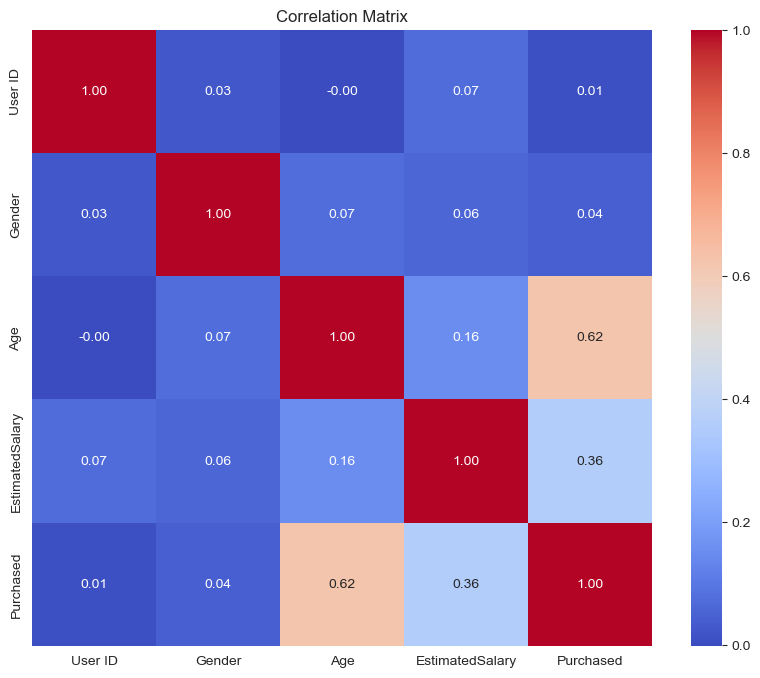

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

It should be noted that the user ID is not significantly related to the purchase tags, since as expected, this characteristic would not be relevant for a prediction. Regarding gender, age and estimated salary, these will be of interest in the training since they represent some relevance for the labels, even though gender is not as strongly linked as the other two, it will also be taken into account so that the network has more features to train with.

Therefore, after this quick analysis, the following transformations will be performed on the data to find the best network performance:

* Removal of the "User ID" column.
* Feature and tag extraction.
* Standardization of characteristics.
* Oversampling for data balancing.
*Standard random separation.

## 4. Data transformation <a name="trans"></a>

### 4.1 Dropping useless column

In [14]:
df.drop(['User ID'], axis=1, inplace=True)
df.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
5,0,27,58000,0
6,1,27,84000,0
7,1,32,150000,1
8,0,25,33000,0
9,1,35,65000,0


### 4.2 Label extraction for prediction

In [16]:
Y = np.array(df['Purchased'])
Y = Y[:, np.newaxis]
df = df.drop("Purchased", axis=1)
Y.shape

(400, 1)

### 4.3 Feature extraction

In [17]:
X = np.array(df)
X.shape

(400, 3)

### 4.4 Data standardization

In [18]:
# Standard Scaler
ss = SS()
X = ss.fit_transform(X)

### 4.5 Data oversampling

To solve the problem of small bias in the data, an oversampling technique will be performed. In this case, the Synthetic Minority Oversampling Technique (SMOTE) will be used to generate synthetic data by oversampling.

In [19]:
s = SMOTE()
X, Y = s.fit_resample(X, Y)

### 4.6 Data spliting

In [20]:
def split_data(X, Y, per, random_state=None):
  # Se realiza una selección aleatoria de índices
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.random.permutation(len(X))
    
    # Se calcula la cantidad de datos para entrenamiento y prueba
    train_size = int(len(X) * (1 - per))
    
    # Se dividen los datos utilizando los índices aleatorios
    X_train = X[indices[:train_size]]
    X_test = X[indices[train_size:]]
    Y_train = Y[indices[:train_size]]
    Y_test = Y[indices[train_size:]]
    
    return X_train, Y_train, X_test, Y_test

X_train, Y_train, X_test, Y_test = split_data(X, Y, 0.3, 42)
Y = Y.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

print("Shape of x:", X.shape)
print("Shape of y:", Y.shape)
print("Shape of x_train:", X_train.shape)
print("Shape of x_test:", X_test.shape)
print("Shape of y_train:", Y_train.shape)
print("Shape of y_test:", Y_test.shape)

Shape of x: (514, 3)
Shape of y: (514, 1)
Shape of x_train: (359, 3)
Shape of x_test: (155, 3)
Shape of y_train: (359, 1)
Shape of y_test: (155, 1)


## 5. Network building <a name="build"></a>

Once the data set has been transformed, separated and ready, the neural network will now be built taking the following steps:

First, a class called "NueralNetwork" will be defined in charge of carrying out all the relevant processes in training, adjustment, label prediction and performance evaluation metrics of the network, based on the architecture that is specified for the desired network, that is That is, the number of layers and neurons in each one.

After the network architecture will be configured, defining the number of layers and neurons in each of the layers with the intention of obtaining the best classification performance.

Finally, the learning rate and the number of epochs that the network will use for training will be specified, obtaining its performance based on the mean square error in its predictions.

### 5.1 Neural Network definition

In [21]:
# Red Neuronal with OOP
class NeuralNetwork:
    '''
    Structure of the Neural Network
     With functions for:
     - Forward
     - Backward
     - Update weights
     - Train
     - Sigmoid activation function
     - MSE error function
    '''

    def __init__(self, layers_n: list):
        '''
        layers_n: List of the layers of the network with the number of neurons per layer
        [6,4,8,4] -> 4 layers, inputs: 6, 2 hidden layers (4 and 8 neurons each), 4 output neuron
        '''
        self.layers_n = layers_n
        self.numLayers = len(layers_n)
        self.Ws = []
        self.biases = []
        self.parameters = {}

        # Set weights
        for i in range(self.numLayers - 1):
            self.Ws.append(np.random.rand(layers_n[i], layers_n[i+1]))
            self.parameters['W' + str(i+1)] = np.random.rand(layers_n[i], layers_n[i+1])

        # Set biases
        for i in range(self.numLayers - 1):
            self.biases.append(np.zeros((1, layers_n[i+1])))
            self.parameters['b' + str(i+1)] = np.zeros((1, layers_n[i+1]))

        print(self.parameters)


    def forward(self, x:np.ndarray):
        '''
        Passage of information forward from input
        '''
        self.outputs = [x]

        for i in range(self.numLayers - 1):
            layer_input = np.dot(self.outputs[-1], self.Ws[i]) + self.biases[i]
            output = self.sigmoide(layer_input)
            self.outputs.append(output)

        return self.outputs[-1]


    def update_weights(self, lr:float, grads:np.ndarray):
        '''
        Updating weights after having calculated gradients
        in backpropagation
        '''

        for i in range(self.numLayers - 1):
            self.Ws[i] += self.outputs[i].T.dot(grads[i]) * lr
            self.biases[i] += np.sum(grads[i], axis=0, keepdims=True) * lr


    def backward(self, x:np.ndarray, y:np.ndarray, lr:float):
        '''
        Step backwards from the error, going through all the neurons of previous layers
        '''
        self.error = y - self.outputs[-1]
        grads = [self.error * self.sigmoide_der(self.outputs[-1])]

        for i in range(self.numLayers - 2, 0, -1):
            delta = grads[-1].dot(self.Ws[i].T) * self.sigmoide_der(self.outputs[i])
            grads.append(delta)

        grads = grads[::-1]
        self.update_weights(lr, grads)


    def mse(self, y:np.ndarray, y_:np.ndarray):
        '''
        MSE loss function
        '''
        return np.mean((y - y_) ** 2)


    def train(self, x:np.ndarray, y:np.ndarray, lr:float, epochs:int):
        '''
        Training loop
        x: input data
        y: output data
        lr: learning rate
        epochs: iterations to train the network
        '''
        errors = []
        for epoch in range(epochs):
            output = self.forward(x)
            self.backward(x, y, lr)
            mse = self.mse(y, output)
            if epoch % 25 == 0:
                errors.append(mse)
            print(f'Epoch: {epoch}, MSE: {mse}')

        iterations = range(0, epochs, 25)

        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(iterations, errors, label='MSE Loss')
        plt.xlabel('Iterations')
        plt.ylabel('MSE Loss')
        plt.legend()


    def sigmoide(self, x):
        '''
        Calculates the sigmoid function for a given matrix or vector
        '''
        if not isinstance(x, np.ndarray):
            raise ValueError("Expected a NumPy array")

        return 1/(1 + np.exp(-x))


    def sigmoide_der(self, x:np.ndarray):
        '''
        Calculates the derivative of the sigmoid function for a given matrix or vector
        '''
        return x * (1 - x)


    # Indicators of performance
    def accuracy(self, y_test:np.ndarray, y:np.ndarray):
        '''
        TN: True negatives
        FP: False positives
        FN: False negatives
        TP: True positives
        '''
        TN = 0
        FP = 0
        FN = 0
        TP = 0

        for i in range(len(y_test)):
            if y_test[i][0] == 0:
                if y_test[i][0] == y[i][0]:
                    TN += 1
                else:
                    FP += 1
            else:
                if y_test[i][0] == y[i][0]:
                    TP += 1
                else:
                    FN += 1

        acc = (TP+TN)/(TP+FP+TN+FN)

        return acc, TN, FP, FN, TP


    # F-1 Score
    def F1_score(self, y_test:np.ndarray, y:np.ndarray):
        _, TN, FP, FN, TP = self.accuracy(y_test, y)

        recall = TP/(TP+FN)
        precision = TP/(TP+FP)
        score = (2 * recall * precision) / (recall + precision)

        return score

### 5.2 Configuration of neural network structure for binary classification

The initial structure of the network consists of an input layer with three neurons, corresponding to the three features used to predict the relevant labels. This relationship is crucial, since the number of neurons in the input layer must match the features present in the training data.

For this relatively simple classification task, a single hidden layer is established, whose training parameters will be meticulously tuned. The number of neurons in this layer is determined through experimentation with various architectural configurations, considering both the nature of the problem and the particularities of the data.

Since this is a binary classification, the output layer consists of only one neuron. This layer dictates the final predictions and then the binary classification criterion is applied using the Sigmoid function.

It is essential to highlight that this neural network structure and design is not suitable for multi-class classification, since the configuration of the output layer and the activation function involved differ significantly.

In [22]:
# Set up and train the neural network
layers = [3, 5, 1]  # 3 inputs, 1 hidden layer and 1 output neuron
neural_network = NeuralNetwork(layers)

{'W1': array([[0.69673717, 0.62894285, 0.87747201, 0.73507104, 0.80348093],
       [0.28203457, 0.17743954, 0.75061475, 0.80683474, 0.99050514],
       [0.41261768, 0.37201809, 0.77641296, 0.34080354, 0.93075733]]), 'W2': array([[0.90255291],
       [0.50525237],
       [0.82645747],
       [0.3200496 ],
       [0.89552323]]), 'b1': array([[0., 0., 0., 0., 0.]]), 'b2': array([[0.]])}


It should be noted that each neuron in the network has a set of weights necessary to establish connections with the subsequent layer. For example, the first layer ('W1') consists of three neurons, each with four weights. These weights are essential to establish connections with the next layer, made up of four neurons.

### 5.3 Network training

Once the random weights and biases are established in each neuron of the layers, the network will undergo the training process using the predefined learning rate and number of epochs. These parameters are refined by exploring various configurations, considering the architecture defined in the previous step.

In this context, satisfactory network performance was achieved by employing a learning rate of 0.01 and 2000 epochs. These values were selected after exhaustive analysis and adjustment, proving to be optimal for training the neural network.

Epoch: 0, MSE: 0.3021190283186068
Epoch: 1, MSE: 0.2680107957890531
Epoch: 2, MSE: 0.23972636849082254
Epoch: 3, MSE: 0.22260625101982973
Epoch: 4, MSE: 0.214193973436979
Epoch: 5, MSE: 0.20942165716587838
Epoch: 6, MSE: 0.2056626714273022
Epoch: 7, MSE: 0.20213190376345624
Epoch: 8, MSE: 0.1986481017967635
Epoch: 9, MSE: 0.19517593835664573
Epoch: 10, MSE: 0.1917122622479574
Epoch: 11, MSE: 0.1882615694685745
Epoch: 12, MSE: 0.18483076921194655
Epoch: 13, MSE: 0.18142783735409457
Epoch: 14, MSE: 0.1780612521276198
Epoch: 15, MSE: 0.1747396152204952
Epoch: 16, MSE: 0.17147134830919994
Epoch: 17, MSE: 0.16826444583736924
Epoch: 18, MSE: 0.1651262802619875
Epoch: 19, MSE: 0.1620634573797847
Epoch: 20, MSE: 0.1590817183369992
Epoch: 21, MSE: 0.15618588375282264
Epoch: 22, MSE: 0.15337983450684692
Epoch: 23, MSE: 0.1506665232426424
Epoch: 24, MSE: 0.14804801051212407
Epoch: 25, MSE: 0.1455255196767065
Epoch: 26, MSE: 0.14309950512029332
Epoch: 27, MSE: 0.14076972893883022
Epoch: 28, MSE: 0

Epoch: 536, MSE: 0.08096741911186374
Epoch: 537, MSE: 0.08091163056720171
Epoch: 538, MSE: 0.08085487258104522
Epoch: 539, MSE: 0.08079713059683838
Epoch: 540, MSE: 0.08073839014390932
Epoch: 541, MSE: 0.08067863686152377
Epoch: 542, MSE: 0.08061785652413767
Epoch: 543, MSE: 0.08055603506783578
Epoch: 544, MSE: 0.08049315861793552
Epoch: 545, MSE: 0.08042921351772658
Epoch: 546, MSE: 0.08036418635830726
Epoch: 547, MSE: 0.08029806400946918
Epoch: 548, MSE: 0.08023083365157145
Epoch: 549, MSE: 0.08016248280833436
Epoch: 550, MSE: 0.08009299938047201
Epoch: 551, MSE: 0.08002237168007109
Epoch: 552, MSE: 0.07995058846561218
Epoch: 553, MSE: 0.07987763897751717
Epoch: 554, MSE: 0.07980351297409533
Epoch: 555, MSE: 0.07972820076774849
Epoch: 556, MSE: 0.07965169326128445
Epoch: 557, MSE: 0.079573981984177
Epoch: 558, MSE: 0.07949505912860025
Epoch: 559, MSE: 0.07941491758505576
Epoch: 560, MSE: 0.07933355097740213
Epoch: 561, MSE: 0.07925095369708955
Epoch: 562, MSE: 0.07916712093639487
Epo

Epoch: 1204, MSE: 0.04584936366087542
Epoch: 1205, MSE: 0.0458423982093712
Epoch: 1206, MSE: 0.04583545477954319
Epoch: 1207, MSE: 0.04582853325747251
Epoch: 1208, MSE: 0.04582163353002359
Epoch: 1209, MSE: 0.045814755484836635
Epoch: 1210, MSE: 0.045807899010320105
Epoch: 1211, MSE: 0.04580106399564344
Epoch: 1212, MSE: 0.045794250330729834
Epoch: 1213, MSE: 0.04578745790624904
Epoch: 1214, MSE: 0.04578068661361034
Epoch: 1215, MSE: 0.045773936344955544
Epoch: 1216, MSE: 0.045767206993152135
Epoch: 1217, MSE: 0.04576049845178653
Epoch: 1218, MSE: 0.04575381061515724
Epoch: 1219, MSE: 0.04574714337826839
Epoch: 1220, MSE: 0.04574049663682312
Epoch: 1221, MSE: 0.04573387028721713
Epoch: 1222, MSE: 0.04572726422653232
Epoch: 1223, MSE: 0.0457206783525305
Epoch: 1224, MSE: 0.04571411256364718
Epoch: 1225, MSE: 0.04570756675898541
Epoch: 1226, MSE: 0.04570104083830976
Epoch: 1227, MSE: 0.04569453470204029
Epoch: 1228, MSE: 0.04568804825124668
Epoch: 1229, MSE: 0.045681581387642375
Epoch: 1

Epoch: 1585, MSE: 0.04414961717739208
Epoch: 1586, MSE: 0.04414662397835839
Epoch: 1587, MSE: 0.04414363505114491
Epoch: 1588, MSE: 0.04414065037928999
Epoch: 1589, MSE: 0.044137669946398346
Epoch: 1590, MSE: 0.044134693736140665
Epoch: 1591, MSE: 0.04413172173225331
Epoch: 1592, MSE: 0.04412875391853797
Epoch: 1593, MSE: 0.04412579027886135
Epoch: 1594, MSE: 0.04412283079715483
Epoch: 1595, MSE: 0.044119875457414186
Epoch: 1596, MSE: 0.04411692424369917
Epoch: 1597, MSE: 0.044113977140133306
Epoch: 1598, MSE: 0.0441110341309035
Epoch: 1599, MSE: 0.04410809520025972
Epoch: 1600, MSE: 0.04410516033251474
Epoch: 1601, MSE: 0.04410222951204377
Epoch: 1602, MSE: 0.044099302723284155
Epoch: 1603, MSE: 0.0440963799507351
Epoch: 1604, MSE: 0.04409346117895732
Epoch: 1605, MSE: 0.04409054639257277
Epoch: 1606, MSE: 0.044087635576264286
Epoch: 1607, MSE: 0.04408472871477535
Epoch: 1608, MSE: 0.044081825792909764
Epoch: 1609, MSE: 0.04407892679553131
Epoch: 1610, MSE: 0.04407603170756353
Epoch: 

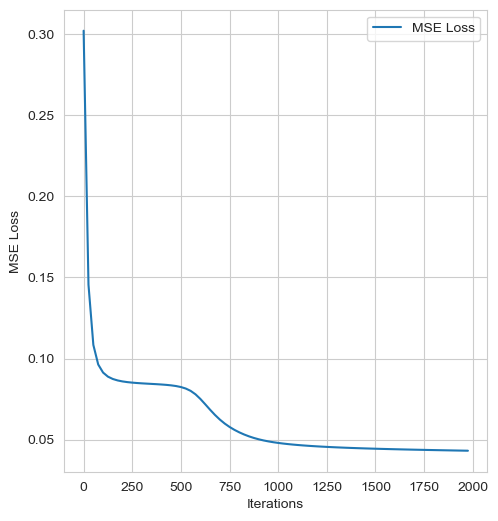

In [23]:
lr = 0.01
epochs = 2000

neural_network.train(X_train, Y_train, lr, epochs)

## 6. Analysis and Metrics <a name="metrics"></a>

Now we can do an analysis of the performance of our neural network.

### 6.1 Network performance

First, some predictions are created with the network trained on its parameters, along with obtaining its mean square error with respect to these predictions.

In [24]:
# Evaluate performance on the test set
pred = neural_network.forward(X_test)
mse = neural_network.mse(Y_test, pred)

In [25]:
# Predictions
pred

array([[0.96704731],
       [0.99823017],
       [0.01663072],
       [0.12691549],
       [0.96371095],
       [0.1741913 ],
       [0.91034526],
       [0.99146915],
       [0.0201423 ],
       [0.97969096],
       [0.92908726],
       [0.06996683],
       [0.9935571 ],
       [0.99982667],
       [0.12063517],
       [0.00395875],
       [0.00230264],
       [0.11821906],
       [0.19623872],
       [0.01096503],
       [0.93185421],
       [0.90787133],
       [0.99836886],
       [0.93237788],
       [0.08743962],
       [0.6759591 ],
       [0.37936867],
       [0.00961357],
       [0.97314068],
       [0.00510804],
       [0.00573271],
       [0.00645375],
       [0.00451821],
       [0.12161886],
       [0.00369943],
       [0.21947044],
       [0.93402624],
       [0.99856619],
       [0.98862626],
       [0.03754669],
       [0.82535215],
       [0.00257032],
       [0.98487252],
       [0.98757146],
       [0.88325217],
       [0.96816302],
       [0.96644576],
       [0.950

Now with the predictions ready, the relevant metrics can be made to evaluate the performance of the built and trained network.

### 6.2 Prediction labeling

At this stage, predictions have been generated, however these are not yet labeled. This process will be carried out using the threshold of 0.5 in the Sigmoid function. This will allow obtaining the desired labels from the generated predictions.

In [26]:
# Apply threshold for binary classification
thresh = 0.5
y_pred = (pred > thresh).astype(int)

# Print performance
print("Mean Square Error on the test set:", mse)

Mean Square Error on the test set: 0.10169789691480474


### 6.3 Accuracy:

In [27]:
acc, TN, FP, FN, TP = neural_network.accuracy(Y_test,y_pred)
print(f'Accuracy: {round(acc,4)*100} %')

Accuracy: 89.03 %


### 6.4 F1-Score

In [28]:
print(f'F1-Score: {round(neural_network.F1_score(Y_test,y_pred),4)*100} %')

F1-Score: 88.28 %


### 6.5 Metrics overall report

We can see the compressed performance of the network in the form of a report.

In [36]:
print(cr(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        87
           1       0.83      0.94      0.88        68

    accuracy                           0.89       155
   macro avg       0.89      0.90      0.89       155
weighted avg       0.90      0.89      0.89       155



### 6.6 Confusion matrix

Finally, by using the confusion matrix, the count of correct labels is obtained and a qualitative understanding of the performance is achieved, including the type 1 and type 2 errors.

Number of True Negatives: 74
Number of False Negatives: 4
Number of True Positives: 64
Number of False Positives: 13


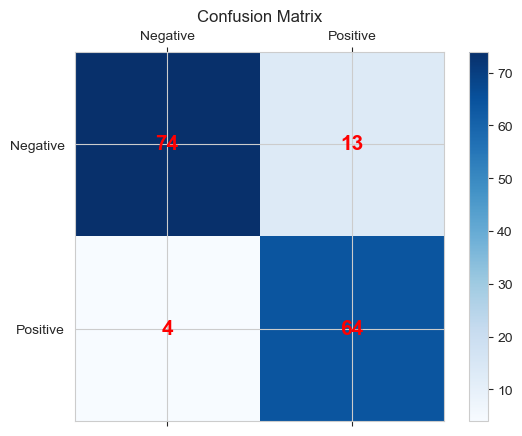

In [29]:
print(f'Number of True Negatives: {TN}')
print(f'Number of False Negatives: {FN}')
print(f'Number of True Positives: {TP}')
print(f'Number of False Positives: {FP}')

# Create the confusion matrix
confusion_matrix = [[TN, FP], [FN, TP]]

# Set up the chart
fig, ax = plt.subplots()
cax = ax.matshow(confusion_matrix, cmap=plt.cm.Blues)
plt.colorbar(cax)

# Define ticks and labels
ticks = [0, 1]
tick_labels = ['Negative', 'Positive']

# Set the ticks and labels on the axes
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(tick_labels)
ax.set_yticklabels(tick_labels)

# Shows the values in the confusion matrix
text_style = {'color': 'red', 'weight': 'bold'}
for i in range(2):
    for j in range(2):
        ax.text(j, i, str(confusion_matrix[i][j]),
                va='center',
                ha='center',
                fontsize=15,
                **text_style)

plt.title('Confusion Matrix')
plt.show()

## 7. Conclusion <a name="con"></a>

After obtaining promising results in the classification metrics, it can be stated that the creation of the neural network from scratch has been successful. The definition of the architecture, the tuning of parameters and the successful execution of the forward and backward processes have been successfully completed.

The fundamental objective of developing the network step by step has been satisfactorily fulfilled, achieving an expected interaction with the generated codes.

Furthermore, although this work presents a basic level, focused on showing the procedure step by step, the network and its classification capacity can be further improved through regularization techniques, such as Dropout or L1/L2 regularization, or by modifying the activation functions. in specific layers.

Despite the simplicity of the data used in this study, the performance of a neural network like this can rival more sophisticated learning models, such as search trees, Random Forest powered by Cross Validation, Grid Search or XGBoost. Choosing the appropriate model will depend on various factors, such as the nature of the problem, available data, computational resources, and the expected results of the project.